In [1]:
import os
import time
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torch import optim
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split


# Data exploration

Data: the dataset is composed of 13642 images of flowers belonging to 14 different classes.

In [10]:
#Utils:
trans_dic2 = {  #for plotting
    0: 'astilbe',
    1: 'bellflower',
    2: 'black eyed susan',
    3: 'calendula',
    4: 'california poppy',
    5: 'carnation',
    6: 'common_daisy',
    7: 'coreopsis',
    8: 'dandelion',
    9: 'iris',
    10: 'rose',
    11: 'sunflower',
    12: 'tulip',
    13: 'water lily'
}
def show_classes_and_shape(classes_imgs, num_to_show, standardized=False):
    """Function that plots images, in case they have been standardized images are rescaled in [0,1]."""
    plt.figure(figsize = (20, 7))
    for i in range(num_to_show):
        img=classes_imgs[i]
        if(standardized):
             img=torch.clamp(img, min=0, max=1)    
        image = (img).permute((1, 2, 0)).numpy().squeeze()  
        if(i==0):
            print("Shape: ", image.shape)
        
        label = trans_dic2[i]
        plt.subplot(2, num_to_show, i + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(str(label))
    plt.tight_layout()
    plt.show()


Labels:

In [3]:
dir=r"C:\Users\margh\Desktop\ML2\ML2\Project\project 2\train" #directory storing the labeled images
labels=[l for l in os.listdir(dir)]
print("Number of labels: ", len(labels))
print("Labels: ", labels)

Number of labels:  14
Labels:  ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


Load and save the data:

In [4]:
data = torchvision.datasets.ImageFolder(dir, transform=torchvision.transforms.ToTensor())
#torch.save(data,'dataset.pth') 

In [12]:
print("Number of samples: ", len(data))

Number of samples:  13642


In [5]:
classes=[]
count=0
for i in range(len(data)):
    if(data[i][1]==count):
        classes.append(data[i][0])
        count+=1
        if(count==14):
            break
    

Shape:  (256, 256, 3)


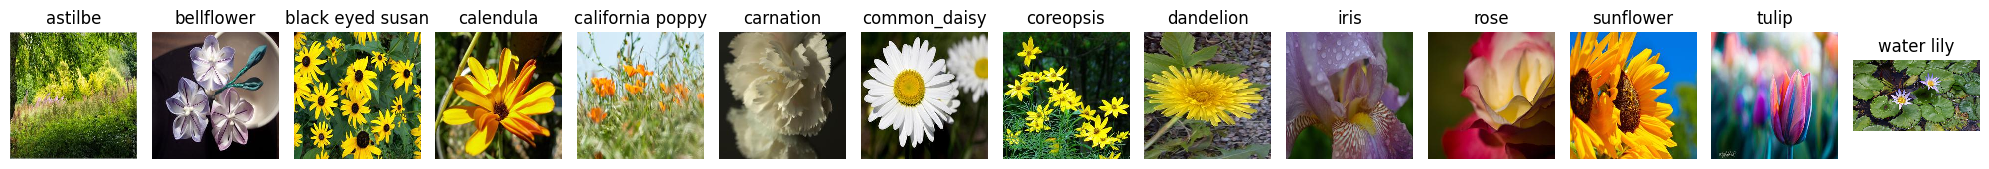

In [11]:
show_classes_and_shape(classes,14)

Distribution of the classes:

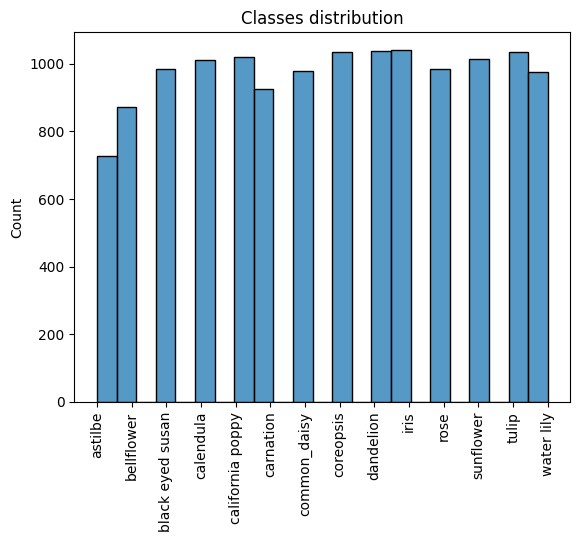

In [48]:
import seaborn as sns
hist=sns.histplot(data.targets);
hist.set_xticks(list(range(14)));
hist.set_xticklabels(trans_dic2.values(), rotation=90);
hist.set_title("Classes distribution");

The classes are balanced except  for the first two classes that are slightly under represented. This can be taken into account in the loss by weighting the classes.

Computing the weights for each class: $w_i=\frac{\text{num samples}}{\text{num classes}|\{j\in\{1,\dots, \text{num samples}\}|y_j=i\}|}$

In [49]:
weights=class_weight.compute_class_weight(class_weight='balanced', classes=np.array(list(set(data.targets))), y=np.array(data.targets))
weights_={k:v for k,v in zip(trans_dic2.values(),weights)}
print(weights_)

{'astilbe': 1.3421881149153876, 'bellflower': 1.1174639580602883, 'black eyed susan': 0.9882642712257317, 'calendula': 0.9638264801469549, 'california poppy': 0.9543864558556038, 'carnation': 1.0545763760049474, 'common_daisy': 0.9963482325445515, 'coreopsis': 0.9414768806073154, 'dandelion': 0.9387558491604734, 'iris': 0.9360505008919995, 'rose': 0.9882642712257317, 'sunflower': 0.961923565082499, 'tulip': 0.9423873998342084, 'water lily': 0.9973680362626115}
